# Dopasowanie krzywych

Posiadając dane doświadczalne oraz model teoretyczny opisujący zjawisko, chcialibyśmy znaleźć wolne parametry które opisują badany przez nas układ.

W celu dopasowania krzywych do danych będziemy wykorzystywali `curve_fit`
z biblioteki `scipy`

Przykładowe wywołanie funkcji dopasowującej krzywą teoretyczną do danych:
```python
par, cov = curve_fit(f, x, y, p0=start, sigma=s, absolute_sigma=True)
```
Zwracane:
1. `par` - array z parametrami najlepszego dopasowania
2. `cov` - macierz kowariancji - diagonalne wyrazy to wariancja danego parametru, a pozostałe to korelacja między parametrami

Przyjmowane:
1. `f` – dopasowywana funkcja
2. `x` – array ze współrzędnymi x punktów
3. `y` – array ze współrzędnymi y punktów

Dodatkowe parametry:
1. `p0` – array z początkowymi wartościami parametrów
2. `sigma` – array z błędami y
3. `absolute_sigma` - ustawiamy `True`


[Dokumentacja curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Parametry dopasowania
[0.80040727 0.41041191]
Niepewnosci tych parametrow
[0.04055835 0.23010386]


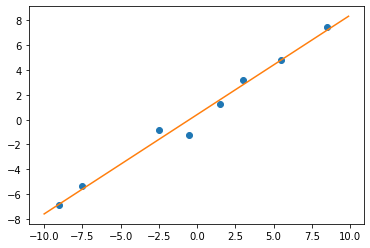

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt("line.txt")
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y, 'o')

def f(x, a, b):
    return a * x + b

par, cov = curve_fit(f, x, y)
print("Parametry dopasowania")
print(par)
print("Niepewnosci tych parametrow")
print(np.sqrt(np.diag(cov)))

x_range = np.arange(-10, 10, 0.1)
plt.plot(x_range, f(x_range, *par))

plt.show()


# To samo ale z niepewnościami

Parametry dopasowania
[0.7760127  0.40379309]
Niepewnosci tych parametrow
[0.02583416 0.16769905]


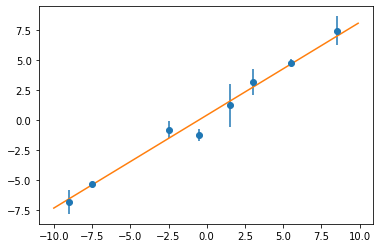

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt("line.txt")
x = data[:, 0]
y = data[:, 1]
dy = data[:, 2]

plt.errorbar(x, y, yerr=dy, fmt = "o")

def f(x, a, b):
    return a * x + b

par, cov = curve_fit(f, x, y, sigma = dy, absolute_sigma=True)
print("Parametry dopasowania")
print(par)
print("Niepewnosci tych parametrow")
print(np.sqrt(np.diag(cov)))

x_range = np.arange(-10, 10, 0.1)
plt.plot(x_range, f(x_range, *par))

plt.show()

# Zadanie 1
Napisz skrypt, który wczytuje dane z pliku dane.txt oraz dopasowuje do nich krzywą najlepszego dopasowania. Plik zawiera 3 kolumny
w postaci $x$, $y$ oraz niepewności $y$ - $\sigma_y$.
1. Zaproponuj funkcję $f(x)$ jaką należy dopasować do danych.
2. Przeprowadź dopasowanie.
3. Wydrukuj na ekran parametry dopasowania oraz ich niepewności
4. Jako rezultat stwórz rysunek przedstawiający dane doświadczalne oraz
dopasowaną do nich krzywą (o pogrubionej różowej linii).
5. Ustaw legendę na rysunku z danymi doświadczalnymi oraz krzywą naj lepszego dopasowania.
6. Nadaj tytuły osiom X ”Numer prążka k” oraz Y ”ciśnienie p [Pa] ” .
7. Rysunek zapisz do formatu pdf.

# Zadanie 2

Napisz skrypt, który wczytuje dane z pliku ikarus.txt (zmierzone czasy z błędami w ***funkcji drogi***  przyspieszającego autobusu) oraz dopasowuje
do nich krzywą najlepszego dopasowania.
Plik zawiera 3 kolumny w postaci $x$, $y$ oraz niepewności $y$ $\sigma_y$.
1. Zaproponuj funkcję $t(s)$ jaką należy dopasować do danych.
2. Przeprowadź dopasowanie.
3. Wydrukuj na ekran parametry dopasowania oraz ich niepewności
4. Jako rezultat stwórz rysunek przedstawiający dane doświadczalne oraz
dopasowaną do nich krzywą (o pogrubionej czerwonej linii).
5. Ustaw legendę na rysunku z danymi doświadczalnymi oraz krzywą najlepszego dopasowania.
6. Nadaj tytuły osiom X ”oś X” oraz Y ”oś Y” .
7. Rysunek zapisz do formatu pdf.

ZADANIE 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Funkcja proponowana do dopasowania – funkcja liniowa
def f(x, a, b):
    return a * x + b

# 2. Wczytanie danych z pliku dane.txt
# Plik musi zawierać 3 kolumny: x, y, sigma_y
data = np.loadtxt("dane.txt")
x = data[:, 0]
y = data[:, 1]
sigma_y = data[:, 2]

# 3. Dopasowanie krzywej z wagami 1/sigma^2
popt, pcov = curve_fit(f, x, y, sigma=sigma_y, absolute_sigma=True)

# Parametry i niepewności (pierwiastek z diagonalnych elementów macierzy)
a, b = popt
sigma_a, sigma_b = np.sqrt(np.diag(pcov))

print("Parametry dopasowania:")
print(f"a = {a:.6f} ± {sigma_a:.6f}")
print(f"b = {b:.6f} ± {sigma_b:.6f}")

# 4. Tworzenie wykresu
plt.errorbar(x, y, yerr=sigma_y, fmt='o', label="Dane doświadczalne")

# Punktowa siatka do rysowania krzywej
x_fit = np.linspace(min(x), max(x), 500)
y_fit = f(x_fit, a, b)

# Krzywa dopasowania — gruba różowa linia
plt.plot(x_fit, y_fit, linewidth=3, color='pink', label="Krzywa najlepszego dopasowania")

# 5. Legenda
plt.legend()

# 6. Opisy osi
plt.xlabel("Numer prążka k")
plt.ylabel("ciśnienie p [Pa]")

# 7. Zapis wykresu do PDF
plt.savefig("dopasowanie.pdf")

plt.show()


ZADANIE 2


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Proponowana funkcja t(s)
def t_of_s(s, a):
    return np.sqrt(2 * s / a)

# 2. Wczytanie danych z pliku ikarus.txt
# Plik musi mieć 3 kolumny: x(s), y(t), sigma_y (niepewność czasu)
data = np.loadtxt("ikarus.txt")
s = data[:, 0]          # przebyta droga
t = data[:, 1]          # zmierzony czas
sigma_t = data[:, 2]    # niepewność czasu

# 3. Dopasowanie krzywej z wagami
popt, pcov = curve_fit(t_of_s, s, t, sigma=sigma_t, absolute_sigma=True)

a = popt[0]                            # dopasowane przyspieszenie
sigma_a = np.sqrt(pcov[0, 0])          # niepewność przyspieszenia

print("Parametry dopasowania:")
print(f"a = {a:.6f} ± {sigma_a:.6f}  [m/s^2]")

# 4. Rysowanie danych i krzywej dopasowania
plt.errorbar(s, t, yerr=sigma_t, fmt='o', label="Dane doświadczalne")

# Gęsta siatka do rysowania krzywej
s_fit = np.linspace(min(s), max(s), 500)
t_fit = t_of_s(s_fit, a)

# Krzywa dopasowania — gruba czerwona linia
plt.plot(s_fit, t_fit, color='red', linewidth=3, label="Krzywa najlepszego dopasowania")

# 5. Legenda
plt.legend()

# 6. Opisy osi
plt.xlabel("oś X")
plt.ylabel("oś Y")

# 7. Zapis wykresu do PDF
plt.savefig("ikarus_dopasowanie.pdf")

plt.show()


ZAD 2+

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# 1. Proponowana funkcja t(s)
def t_of_s(s, a):
    return np.sqrt(2 * s / a)

# 2. Wczytanie danych z pliku ikarus.txt
data = np.loadtxt("ikarus.txt")
s = data[:, 0]          # przebyta droga
t = data[:, 1]          # zmierzony czas
sigma_t = data[:, 2]    # niepewność czasu

# 3. Dopasowanie krzywej
popt, pcov = curve_fit(t_of_s, s, t, sigma=sigma_t, absolute_sigma=True)

a = popt[0]
sigma_a = np.sqrt(pcov[0, 0])

print("Parametry dopasowania:")
print(f"a = {a:.6f} ± {sigma_a:.6f}  [m/s^2]")

# -------------- TEST CHI-KWADRAT --------------

# wartości dopasowane
t_fit_values = t_of_s(s, a)

# chi-kwadrat
chi2_value = np.sum(((t - t_fit_values) / sigma_t) ** 2)

# liczba stopni swobody
N = len(s)       # liczba punktów
p = 1            # liczba parametrów (a)
dof = N - p      # stopnie swobody

# chi2 reduced (na stopień swobody)
chi2_red = chi2_value / dof

print("\nTest chi-kwadrat:")
print(f"χ² = {chi2_value:.3f}")
print(f"Stopnie swobody = {dof}")
print(f"χ²/ν = {chi2_red:.3f}")

# 4. Rysowanie danych i krzywej dopasowania
plt.errorbar(s, t, yerr=sigma_t, fmt='o', label="Dane doświadczalne")

s_fit = np.linspace(min(s), max(s), 500)
t_fit = t_of_s(s_fit, a)

plt.plot(s_fit, t_fit, color='red', linewidth=3,
         label="Krzywa najlepszego dopasowania")

# 5. Legenda
plt.legend()

# 6. Opisy osi
plt.xlabel("oś X")
plt.ylabel("oś Y")

# 7. Zapis wykresu do PDF
plt.savefig("ikarus_dopasowanie.pdf")

plt.show()